In [ ]:
#Observed Trend 1
#Observed Trend 2
#Observed Trend 3

In [263]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [264]:
city_data = "raw_data/city_data.csv"
ride_data = "raw_data/ride_data.csv"

In [265]:
city_data_pd = pd.read_csv(city_data)
ride_data_pd = pd.read_csv(ride_data)

In [266]:
city_data_pd.head()

,city,driver_count,type
0,Kelseyland,63,Urban
1,Nguyenbury,8,Urban
2,East Douglas,12,Urban
3,West Dawnfurt,34,Urban
4,Rodriguezburgh,52,Urban


In [267]:
ride_data_pd.head()

,city,date,fare,ride_id
0,Sarabury,2016-01-16 13:49:27,38.35,5403689035038
1,South Roy,2016-01-02 18:42:34,17.49,4036272335942
2,Wiseborough,2016-01-21 17:35:29,44.18,3645042422587
3,Spencertown,2016-07-31 14:53:22,6.87,2242596575892
4,Nguyenbury,2016-07-09 04:42:44,6.28,1543057793673


In [268]:
#Your objective is to build a Bubble Plot that showcases the relationship between four key variables:

#Average Fare ($) Per City
#Total Number of Rides Per City
#Total Number of Drivers Per City
#City Type (Urban, Suburban, Rural)

In [269]:
combined_data = pd.merge(ride_data_pd, city_data_pd, on="city")
combined_data.head()


,city,date,fare,ride_id,driver_count,type
0,Sarabury,2016-01-16 13:49:27,38.35,5403689035038,46,Urban
1,Sarabury,2016-07-23 07:42:44,21.76,7546681945283,46,Urban
2,Sarabury,2016-04-02 04:32:25,38.03,4932495851866,46,Urban
3,Sarabury,2016-06-23 05:03:41,26.82,6711035373406,46,Urban
4,Sarabury,2016-09-30 12:48:34,30.30,6388737278232,46,Urban


In [270]:
total_driver_city = city_data_pd["driver_count"]

In [271]:
#Total Rides by City Type
city_group = combined_data.groupby(['type','city'])
total_city_rides = city_group['ride_id'].count()

#urban
urban_id_count = "Urban"
just_urban_count  = total_city_rides.loc[urban_id_count]

#rural
rural_id_count = "Rural"
just_rural_count  = total_city_rides.loc[rural_id_count]

#Suburban
sub_id_count = "Suburban"
just_sub_count  = total_city_rides.loc[sub_id_count]

In [272]:
#Average Fare ($) Per City
urban_data = combined_data.groupby(['type','city'])
avg_fare = urban_data['fare'].mean()

#urban
urban_id_avg = "Urban"
just_urban_avg = avg_fare.loc[urban_id_avg]

#rural
rural_id_avg = "Rural"
just_rural_avg = avg_fare.loc[rural_id_avg]

#rural
sub_id_avg = "Suburban"
just_sub_avg = avg_fare.loc[sub_id_avg]


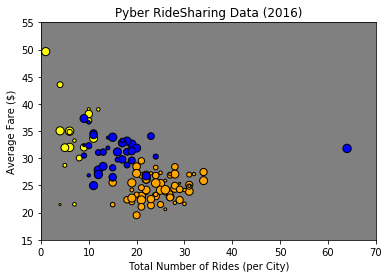

In [277]:
plt.title("Pyber RideSharing Data (2016)")
plt.xlabel("Total Number of Rides (per City)")
plt.ylabel("Average Fare ($)")

plt.ylim(15,55)
plt.xlim (0,70)

plt.scatter(just_urban_count, just_urban_avg, s=total_driver_city, marker="o", facecolors="orange", edgecolors="black")
plt.scatter(just_rural_count, just_rural_avg, s=total_driver_city, marker="o", facecolors="yellow", edgecolors="black")
plt.scatter(just_sub_count, just_sub_avg, s=total_driver_city, marker="o", facecolors="blue", edgecolors="black")
plt.show()

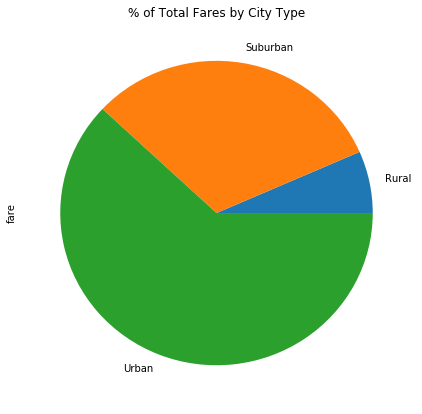

In [279]:
# % of Total Fares by City Type

total_fare = combined_data['fare'].sum()
type_fare = combined_data.groupby('type')
total_fare_type = type_fare['fare'].sum() / total_fare * 100
total_fare_type

fare_chart = total_fare_type.plot(kind='pie', figsize=(7,7), title=("% of Total Fares by City Type"))



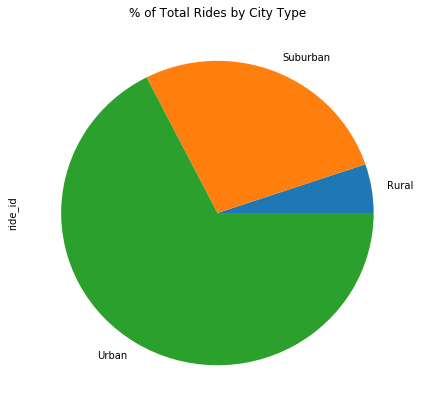

In [280]:
# Total Rides by City Type
type_group = combined_data.groupby('type')
total_type_rides = type_group['ride_id'].count()
total_rides_type = total_type_rides / total_type_rides.sum() * 100

rides_chart = total_rides_type.plot(kind='pie', figsize=(7,7), title=("% of Total Rides by City Type"))

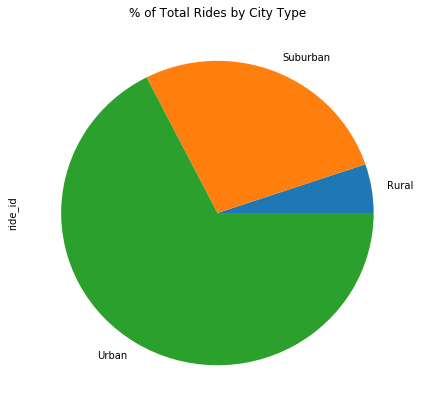

In [281]:
driver_group = combined_data.groupby('type')
driver_type_group = driver_group['ride_id'].count()

driver_chart = driver_type_group.plot(kind='pie', figsize=(7,7), title=("% of Total Rides by City Type"))